# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np
n_train = y_train.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(np.concatenate((y_train, y_test))))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

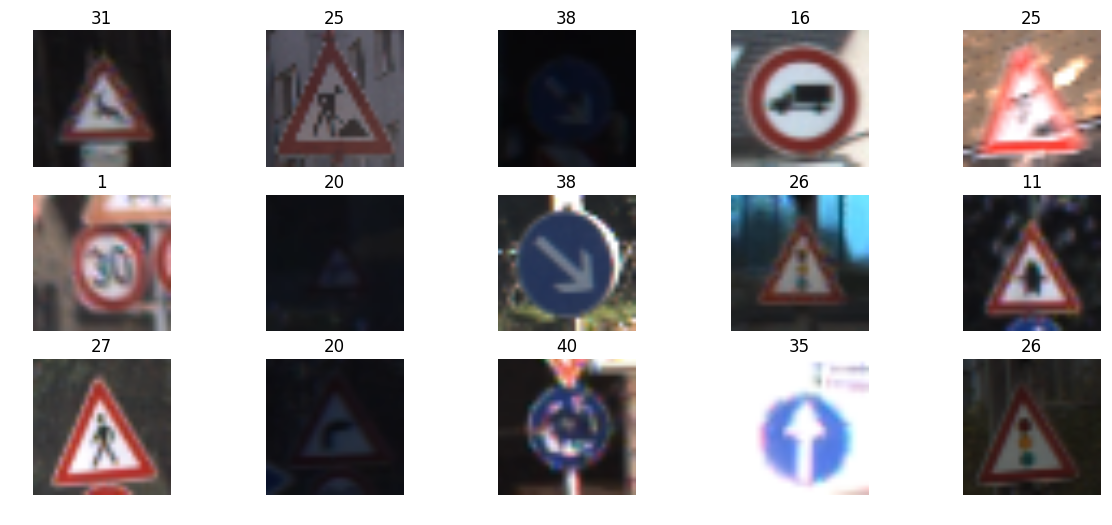

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# show 15 random images
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(15):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

In [4]:
plt.imsave("sign.png", image, format="png")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

gray_scale done
stretch done


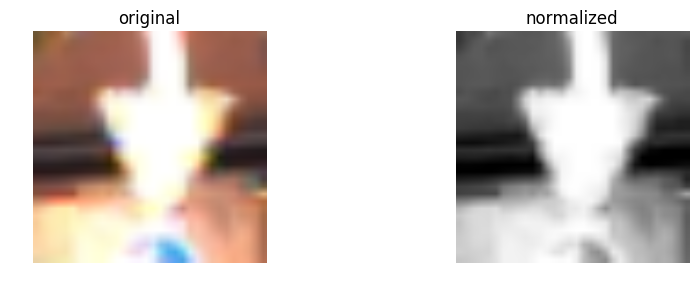

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from skimage import exposure

"""
I'm including the code for all data manipulations that I tried.
Only the uncommented functions at the bottom were selected as improving the model accurary
"""

  
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from skimage import exposure
import random

  
def stretch_pixels():
    """Stretch pixel values
    """
    for i in range(len(X_train)):
        img = X_train[i]
        p2 = np.percentile(img, 2)
        p98 = np.percentile(img, 98)
        img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
        X_train[i] = img_rescale
    for i in range(len(X_test)):
        img = X_test[i]
        p2 = np.percentile(img, 2)
        p98 = np.percentile(img, 98)
        img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
        X_test[i] = img_rescale
    print('stretch done')
    

def normalize_data(X_train, X_test):
    """Normalise input (images still in colour)
    """
    X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
    X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))
    print('normalize data done')

def normalize_pixels(X_train, X_test):
    X_train_normalized = (X_train - 128)/128 
    X_test_normalized = (X_test - 128)/128
    print('normalize pixels done')
    return X_train_normalized, X_test_normalized

def gray_scale(X_train, X_test):
    X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)
    X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)
    print('gray_scale done')
    return X_train_gry, X_test_gry

index = random.randint(0, len(X_train))

test_img_original = np.copy(X_train[index]) 

X_train, X_test =  gray_scale(X_train, X_test) 
stretch_pixels()
#normalize_data(X_train, X_test)
#X_train, X_test = normalize_pixels(X_train, X_test)

# Compare the output of grayscale/mornalize images with original

fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('original')
axs[0].imshow(test_img_original.squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('normalized')
axs[1].imshow(X_train[index].squeeze(), cmap='gray')

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I compared the model performance of several techniques. Below are the tecnhiques I tried, and the model's Accuracy. Above, I included the code for all the different tecnhiques tried. The function call to those that did not improve performance is commented out.

- Stretch pixel distribution (stretch_pixels_dist): Validation Accuracy = 0.956; Test Accuracy = 0.873
- standardize pixels (normalize_data): Validation Accuracy = 0.953; Test Accuracy = 0.873
- normalize_pixels (normalize_pixels): Validation Accuracy = 0.951, Test Accuracy = 0.881
- convert to grayscale (gray_scale): Validation Accuracy = 0.965; Test Accuracy = 0.874
- grayscale + normalize: Validation Accuracy = 0.959; Test Accuracy = 0.876
- grayscale + stretch: Validation Accuracy = 0.986; Test Accuracy = 0.923
- grayscale + stretch + normalize: Validation Accuracy = 0.982; Test Accuracy = 0.908


** Conclusion**

- Converting the image image to grayscale, together with stretching the pixel distribution, had the biggest impact in the performer of the network

- including dropout before and after layer 4 (regular lenet architecture), with grayscale and stretching of pixel distribution, increased performance to: Validation Accuracy = 0.987; Test Accuracy = 0.937



## Generate Additional data

Number of training examples in original set 39209


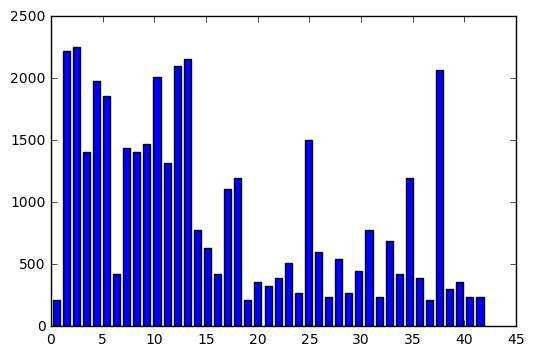

'\n# note: I\'m running this to generate the histogram, but assigning the result to a discarded variable,  since I do not want to use the augmented dataset for training (no performance improvement, while slowing down training)\n_X_train , _y_train = additional_data(X_train, y_train)\nprint("Number of training examples after adding additional data", len(_y_train))\n\n# histogram number of cases per label\nhist, bins = np.histogram(_y_train, bins=n_classes)\nwidth = 0.7 * (bins[1] - bins[0])\ncenter = (bins[:-1] + bins[1:]) / 2\nplt.bar(center, hist, align=\'center\', width=width)\nplt.show()\n\n'

In [6]:
import matplotlib as mpl
from skimage import data, segmentation, color
from skimage.future import graph
from skimage.transform import rotate
from matplotlib import pyplot as plt
from skimage.filters import gaussian
from skimage.transform import SimilarityTransform
from skimage.transform import warp


def additional_data(X_train, y_train):
    counts_number_of_images_per_label = {}
    for x in y_train:
        if x not in counts_number_of_images_per_label:
            counts_number_of_images_per_label[x]=1
        else:
            counts_number_of_images_per_label[x]+=1

    needed_to_equalize_to_max_count = {}

    max_count = max(counts_number_of_images_per_label.values())
    for i in counts_number_of_images_per_label:
        needed_to_equalize_to_max_count[i] = int(( max_count- 
                       counts_number_of_images_per_label[i])/counts_number_of_images_per_label[i])

    X_train_additional = []
    y_train_additional = []
    for i in range(len(X_train)):
        t = y_train[i]
        for x in range(needed_to_equalize_to_max_count[t]):
            img = rotate(X_train[i], random.choice([-15, 0, 15]))
            tform = SimilarityTransform(translation=(0, random.randint(-2,2)))
            img = warp(img, tform)
            img = gaussian(img, sigma=random.randint(0,8)/10)
            X_train_additional.append(img)
            y_train_additional.append(y_train[i])       
    X_train_ = np.concatenate((X_train, X_train_additional), axis=0)
    y_train_ = np.concatenate((y_train, y_train_additional), axis=0)      
    #print('additional data done')
    return X_train_, y_train_ 

print("Number of training examples in original set", len(y_train))
# histogram number of cases per label
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

"""
# note: I'm running this to generate the histogram, but assigning the result to a discarded variable,  since I do not want to use the augmented dataset for training (no performance improvement, while slowing down training)
_X_train , _y_train = additional_data(X_train, y_train)
print("Number of training examples after adding additional data", len(_y_train))

# histogram number of cases per label
hist, bins = np.histogram(_y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

"""

In [7]:
# Shuffle data

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, y_train = shuffle(X_train, y_train, random_state=14)
X_test, y_test = shuffle(X_test, y_test, random_state=14)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.33, random_state=42)




In [8]:
print(X_train.shape)
print(len(y_train))

(26270, 32, 32, 1)
26270


16
8868


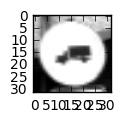

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])
print(index)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I used the SciKit Learn train_test_split function to create a validation set from the training set (25%).

Fpr experimented with generating new data with transformations that were indicated  as benefitial by the LeCun paper, for classes of images that were under-represent (less than number in the class with max number of members). For each under-represented class, I uniformely generated the required number of examples among the existing members of the class, to bring the number to same as those in the class with the most members.

The original dataset had 39209 cases, when the augmented dataset had 83007 cases. I applied random transformations, as suggested by the LeCun paper.

 - image translation (with skimage warp function)
 - image rotation (skimage rotate)
 - blurring (skimage gaussian function)
 
  
 Result: Validation Accuracy = 0.985; Test Accuracy = 0.927

** Conclusion **
Although these transformations have been reported in the literature, in my case, they provided no improvement in the model, while significantly reducing speed. Thefore, I generate the augmented data to display the histogram of the frequencings in the new augmented dataset, but I discard that dataset and just use the original one.



In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [11]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128

In [12]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    #conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 14x14x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(15, 15, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    #conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    # SOLUTION: Flatten. Input = 14x14x16. Output = 3136.
    fc0   = flatten(conv2)
    
    
    # SOLUTION: Layer 3: Fully Connected. Input = 3136. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(3136, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    #fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 240. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    #fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    print("done")
    return logits


In [13]:
from tensorflow.contrib.layers import flatten

def Lecun_like(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    print("layer 1 shape:",conv1.get_shape())
    
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1_for_3nd_stage = conv1
    
    
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    print("layer 2 shape:",conv2.get_shape())
    # Activation.
    conv2 = tf.nn.relu(conv2)

    #Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2_for_3nd_stage = conv2
    
    # Flatten. Input = 5x5x16. Output = 400.
    #fc0   = flatten(conv2)
    
    
    # Layer 3: Fully Connected. Input = 10x10x16. Output = 1x1x400.
    
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    print("layer 3 shape:",conv3.get_shape())
    
    # Activation.
    conv3    = tf.nn.relu(conv3)
    layer3 = conv3
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(conv2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    layer1_3nd_stage_flatten = flatten(layer1_for_3nd_stage)
    layer2_3nd_stage_flatten = flatten(layer2_for_3nd_stage)
    
    # Flatten conv3. Input = 1x1x400. Output = 400.
    conv3flat = flatten(conv3)
    print("conv3flat shape:",conv3flat.get_shape())
    
    # Concat layer2flat and conv3flat. Input = 400 + 400. Output = 800
    conv4 = tf.concat_v2([layer2_3nd_stage_flatten, conv3flat], 1)
    #print("conv3_layer2 shape:",conv3.get_shape())
    print("BBB", conv3.get_shape())
    
    # Dropout
    conv4 = tf.nn.dropout(conv4, keep_prob)
    
    
    # Layer 4: Fully Connected. Input = 800. Output = 43.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(43))
    logits    = tf.matmul(conv4, fc2_W) + fc2_b

    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I Experimented both with the lenet architecture, and the architecture in the Lecun's paper. 

- Lenet:
    1. 5x5 convolution (32x32x1 in, 28x28x6 out)
    2. ReLU
    3. 2x2 max pool (28x28x6 in, 14x14x6 out)
    4. 5x5 convolution (14x14x6 in, 10x10x16 out)
    5. ReLU
    6. 2x2 max pool (10x10x16 in, 5x5x16 out)
    7. 5x5 convolution (5x5x6 in, 1x1x400 out)
    8. ReLu
    9. 2x2 max pool (10x10x16 in, 5x5x16 out)
    10. Flatten layers from numbers (5x5x10 -> 400)
    11. fully connected (400 in, 120 out)
    12. ReLu
    13. Dropout layer
    14. fully connected (120 in, 84 out)
    15. ReLu1
    16. Dropout layer   
    17. fully connected (84 in, 43 out)
-   
- Lecun Like:
    1. 5x5 convolution (32x32x1 in, 28x28x6 out)
    2. ReLU
    3. 2x2 max pool (28x28x6 in, 14x14x6 out)
    4. 5x5 convolution (14x14x6 in, 10x10x16 out)
    5. ReLU
    6. 2x2 max pool (10x10x16 in, 5x5x16 out)
    7. 5x5 convolution (5x5x6 in, 1x1x400 out)
    8. ReLu
    9. Flatten layers from numbers 8 (1x1x400 -> 400) and 6 (5x5x16 -> 400)
    10. Concatenate flattened layers to a single size-800 layer
    11. Dropout layer
    12. Fully connected layer (800 in, 43 out)

In [14]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

In [15]:
rate = 0.001

logits = LeNet(x)  # Lecun_like(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

done


In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.80})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.935

EPOCH 2 ...
Validation Accuracy = 0.959

EPOCH 3 ...
Validation Accuracy = 0.972

EPOCH 4 ...
Validation Accuracy = 0.971

EPOCH 5 ...
Validation Accuracy = 0.977

EPOCH 6 ...
Validation Accuracy = 0.979

EPOCH 7 ...
Validation Accuracy = 0.977

EPOCH 8 ...
Validation Accuracy = 0.980

EPOCH 9 ...
Validation Accuracy = 0.983

EPOCH 10 ...
Validation Accuracy = 0.986

EPOCH 11 ...
Validation Accuracy = 0.987

EPOCH 12 ...
Validation Accuracy = 0.982

EPOCH 13 ...
Validation Accuracy = 0.984

EPOCH 14 ...
Validation Accuracy = 0.983

EPOCH 15 ...
Validation Accuracy = 0.985

EPOCH 16 ...
Validation Accuracy = 0.986

EPOCH 17 ...
Validation Accuracy = 0.983

EPOCH 18 ...
Validation Accuracy = 0.971

EPOCH 19 ...
Validation Accuracy = 0.981

EPOCH 20 ...
Validation Accuracy = 0.979

Model saved


In [18]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
"""
# evaluate accuracy on test data:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))
"""

Test Accuracy = 0.917


'\n# evaluate accuracy on test data:\nwith tf.Session() as sess:\n    sess.run(tf.global_variables_initializer())\n    saver = tf.train.import_meta_graph(\'./lenet.meta\')\n    saver.restore(sess, "./lenet")\n    test_accuracy = evaluate(X_test_normalized, y_test)\n    print("Test Set Accuracy = {:.3f}".format(test_accuracy))\n'

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

- After several tests (see below), I chose the following parameters:
        - letnet architecture
        - adam optimizer
        - no dropout
        - learning rate: 0.001
        - mu: 0
        - sigma: 0.1
        - # epochs: 50



I Experimented with several optimizers, using the base letnet architecture witout modifications. The results were (Validation Accuracy / Test Accuracy) :
    - adagrad optimizer:  0.678 / 0.620
    - FtrlOptimizer: 0.798 / 0.747
    - RMSPropOptimizer: 0.941 / 0.864
    - Adam optimizer: 0.956 / 0.873
    
I used the lenet architecture as a basis for my exploration. I Experimented with pooling/no pooling and dropout/no dropout, number of epochs, learning rate, and layer's shape. The followinf are the results:


- pool/dropout (0.2): Validation / Test Accuracy = 0.985/0.930
- pool/no dropout: 0.983 / 0.898
- no pool/no dropout: 0.972 / 0.908

- change layers shape (Layer 2 Output = 14x14x16; Layer 3 Output = 240) + 
    - no pool/no dropout: 0.990 / 0.938
    - no pool/dropout: 0.986 / 0.921
    - no pool/dropout: 0.986 / 0.921
    - no pool/no dropout + batch size = 100: 0.986 / 0.932
    - no pool/no dropout + learning rate = 0.0005: 0.988
    - no pool/no dropout + learning rate = 0.002: 0.983 / 0.93
    - no pool/no dropout / # epochs: (Validation accurary)
        - 20: 0.987
        - 30: 0.990
        - 40: 0.990
        - 50: 0.991

test accuracy at epoch 50: 0.940


- I also experimented with Lecun's architecture (see above):
    - Validation / Test Accuracy = 0.991 / 0.930 (no pooling)  / 0.990 / 0.92.5 (pooling)

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I used both approaches:
    - I started with 2 known architectures: Lenet, and the architecture in the lenet paper. 
    - Then, I u sed trial and error to slightly change the convolutions, and tune hyperparameters (optimizer, dropout, pooling, learning rate, number of epochs)


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Number of images:  10


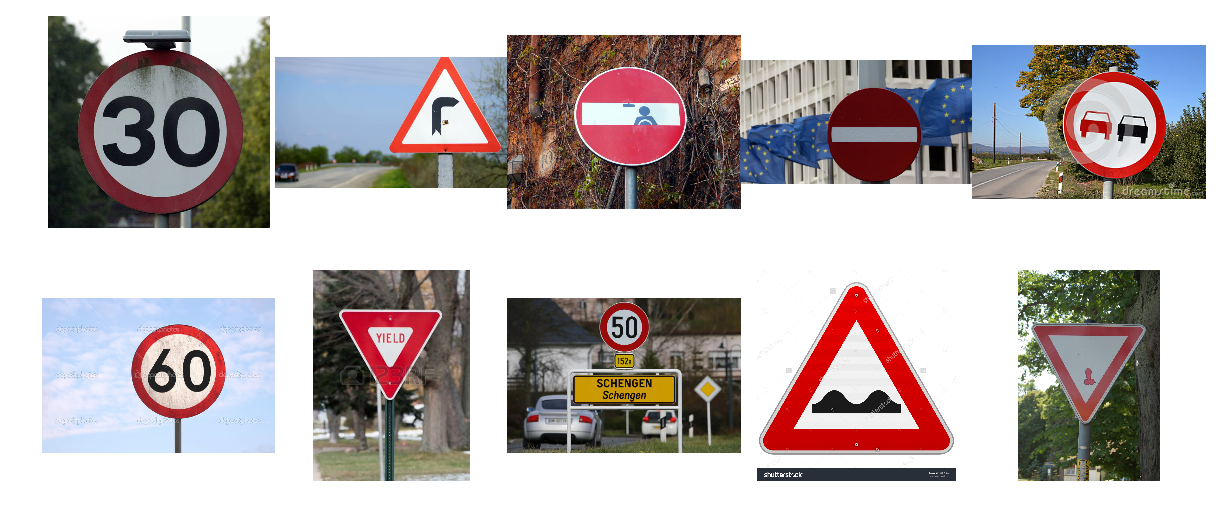

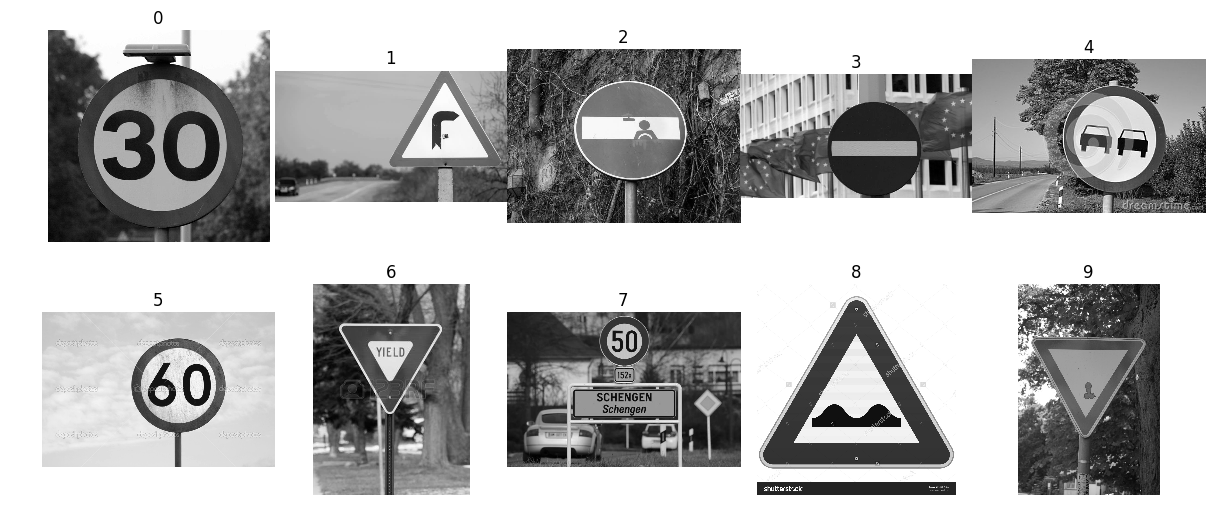

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import exposure
import numpy as np
import tensorflow as tf
import numpy as np
import cv2


import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

my_images = []

for i, img in enumerate(glob.glob('./my_street_signs/*.jpg')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))   

    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    p2 = np.percentile(grayscale, 2)
    p98 = np.percentile(grayscale, 98)
    img_rescale = exposure.rescale_intensity(grayscale, in_range=(p2, p98))
    my_images.append(grayscale)

my_images_processed = np.asarray(my_images)

print("Number of images: ", my_images_processed.shape[0])


fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    image = my_images_processed[i]
    axs[i].axis('off')
    axs[i].imshow(image, cmap="gray")
    axs[i].set_title(i)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

- The sign does not occupy a lot of the image
- There's more than 1 sign in an image

In [20]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

my_labels = [1, 20, 17, 12, 38, 3, 7, 2, 22, 7]
BATCH_SIZE = 1
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    batch_x, batch_y = my_images_processed[0:10], my_labels[0:10]
    validation_accuracy = evaluate(X_validation, y_validation)
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print()
        
    #saver = tf.train.import_meta_graph('./lenet.meta')
    #saver.restore(sess, "./lenet")
    #my_accuracy = evaluate(my_images_processed, my_labels)
    #print("Test Set Accuracy = {:.3f}".format(my_accuracy))
    
    
"""
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.80})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
"""

Validation Accuracy = 0.027



'\nwith tf.Session() as sess:\n    sess.run(tf.global_variables_initializer())\n    num_examples = len(X_train)\n    \n    print("Training...")\n    print()    \n    for i in range(EPOCHS):\n        X_train, y_train = shuffle(X_train, y_train)\n        for offset in range(0, num_examples, BATCH_SIZE):\n            end = offset + BATCH_SIZE\n            batch_x, batch_y = X_train[offset:end], y_train[offset:end]\n            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.80})\n            \n        validation_accuracy = evaluate(X_validation, y_validation)\n        print("EPOCH {} ...".format(i+1))\n        print("Validation Accuracy = {:.3f}".format(validation_accuracy))\n        print()\n'

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [21]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, 
                                 feed_dict={x: my_images_processed[0:10],  y: my_labels,
                                            keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_processed, y: my_labels, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(my_images),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(my_images):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_validation == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_validation[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_validation == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_validation[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_validation == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_validation[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))

ValueError: setting an array element with a sequence.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
fig, axs = plt.subplots(8,2, figsize=(9, 19))
axs = axs.ravel()

for i in range(len(my_softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(cv2.cvtColor(my_images[i//2], cv2.COLOR_BGR2RGB))
    else:
        axs[i].bar(np.arange(n_classes), my_softmax_logits[(i-1)//2]) 
        axs[i].set_ylabel('Softmax probability')

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.